In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_sas("payhistory.sas7bdat")
data.head()

,PID,PDATE,PAMT,EXTRELNO,PAYTYPECD,STATUS
0,38.0,1993-12-31,9.57,b'0000019',b'X',b'CO'
1,39.0,1993-12-31,41.32,b'0000020',b'X',b'CO'
2,40.0,1993-12-31,13.10,b'0000020',b'X',b'CO'
3,54091.0,1994-01-01,2.02,b'0000020',b'X',b'CO'
4,104480.0,1994-05-19,0.50,b'0000020',b'D',b'OK'


In [3]:
data.iloc[:,3]=data.iloc[:,3].str.decode("utf-8")
data.iloc[:,4]=data.iloc[:,4].str.decode("utf-8")
data.iloc[:,5]=data.iloc[:,5].str.decode("utf-8")
data.head()

,PID,PDATE,PAMT,EXTRELNO,PAYTYPECD,STATUS
0,38.0,1993-12-31,9.57,0000019,X,CO
1,39.0,1993-12-31,41.32,0000020,X,CO
2,40.0,1993-12-31,13.10,0000020,X,CO
3,54091.0,1994-01-01,2.02,0000020,X,CO
4,104480.0,1994-05-19,0.50,0000020,D,OK


In [4]:
data1=pd.read_sas("comclas.sas7bdat")
data1.head()

,CLASCODE,CLASDESC
0,b'CT',b'CTS-item'
1,b'RI',b'Request for information'
2,b'CM',b'Complaint'
3,b'TA',b'Threath / Accusation'
4,b'AK',b'Acknowledgement'


In [5]:
for col in data1.columns:
    data1[col]=data1[col].str.decode("utf-8")

In [6]:
data1.head()

,CLASCODE,CLASDESC
0,CT,CTS-item
1,RI,Request for information
2,CM,Complaint
3,TA,Threath / Accusation
4,AK,Acknowledgement


In [7]:
data2=pd.read_sas("commaint.sas7bdat")
data2.head()
for col in data2.columns:
    data2[col]=data2[col].str.decode("utf-8")
data2.head()

,MNTOPCODE,MNTOPDESC
0,CAN,Cancellations/replacements
1,DIS,Discontinuations
2,MKT,Marketing - Enquiries
3,GEN,General
4,NEW,New relations


In [8]:
data3=pd.read_sas("commediu.sas7bdat")
data3.head()
for col in data3.columns:
    data3[col]=data3[col].str.decode("utf-8")
data3.head()

,MEDIUMCODE,MEDIUMDESC
0,FF,Face to Face contact
1,FX,Fax
2,TX,Telex
3,EM,Electronic Mail
4,TE,Telephone call


In [9]:
data4=pd.read_sas("communication.sas7bdat")
data4.head()
for col in data4.columns:
    if col != 'CONTDATE':
        data4[col]=data4[col].str.decode("utf-8")
data4.head()

,CONTID,MEDIUMCODE,MNTOPCODE,CLASCODE,EXTRELNO,CONTDIREC,CONTDATE
0,000405402,CI,CTS,CT,0000020,O,1994-05-09
1,000430904,CI,CTS,CT,0000020,O,1994-06-14
2,000592732,CI,CTS,CT,0000020,O,1994-10-21
3,000593375,CI,CTS,CT,0000020,O,1994-10-21
4,000618514,CI,CTS,CT,0000020,O,1994-11-28


In [10]:
data5=pd.read_sas("extrel.sas7bdat")
data5.head()
data5['EXTRELNO']=data5.iloc[:,0].str.decode("utf-8")
data5['EXRELACTCD']=data5.iloc[:,1].str.decode("utf-8")
data5.head()

,EXTRELNO,EXRELACTCD,EXTRELSTDT,EXRELDATEN
0,0026414,CT,1995-02-02,NaT
1,0026419,FP,1992-03-01,NaT
2,0026424,FP,1992-03-01,1996-12-24
3,0026430,FP,1992-03-01,2006-01-31
4,0026430,CT,1997-03-07,NaT


In [11]:
data6=pd.read_sas("extrelty.sas7bdat")
data6.head()
for col in data6.columns:
    data6[col]=data6[col].str.decode("utf-8")
data6.head()

,EXRELACTCD,EXRELACTDE
0,FP,CommitmentDo
1,PS,Prospect
2,PF,Prosp Fundra
3,PP,Prosp Promot
4,GR,Grantor


In [12]:
data7=pd.read_sas("nameaddr.sas7bdat")
data7.head()
data7['NAME1TITLE']=data7.iloc[:,1].str.decode("utf-8")
data7['EXTRELNO']=data7.iloc[:,0].str.decode("utf-8")
data7['POSTCODE']=data7.iloc[:,2].str.decode("utf-8")
data7['LANGUACODE']=data7.iloc[:,3].str.decode("utf-8")
data7.head()

,EXTRELNO,NAME1TITLE,POSTCODE,LANGUACODE
0,0000019,HR,2500,NL
1,0000020,HR,9550,NL
2,0000035,HM,2150,NL
3,0000042,FA,3012,NL
4,0000043,MW,3000,NL


In [13]:
import datetime
new_data=data[((data['PDATE']>=pd.Timestamp(2006,1,1)) & (data['PDATE']<=pd.Timestamp(2006,12,31)))]

In [14]:
new_data4=data4[((data4['CONTDATE']>=pd.Timestamp(2006,1,1)) & (data4['CONTDATE']<=pd.Timestamp(2006,12,31)))]

In [15]:
new_data5=data5[((data5['EXRELDATEN']>=pd.Timestamp(2006,1,1)) & (data5['EXRELDATEN']<=pd.Timestamp(2006,12,31)))]

In [16]:
donors=(new_data4['EXTRELNO'].unique())

In [17]:
ind_data=(new_data4['EXTRELNO'].value_counts()).to_frame()

In [18]:
ind_data.index.names = ['EXTRELNO']
ind_data.rename(index={None:'EXTRELNO'},columns={'EXTRELNO':'Frequency'},inplace=True)

In [19]:
new_data4['recency']=pd.Timestamp(2007,2,2)-new_data4['CONTDATE']

C:\Users\161262\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
ind_data['recency']=new_data4.groupby('EXTRELNO').recency.min()

In [21]:
ind_data.head()

,Frequency,recency
EXTRELNO,,
0181194,201,38 days
0221225,63,52 days
0223508,61,35 days
0232989,59,59 days
0235715,50,63 days


In [22]:
ind_data['sum']=new_data.groupby('EXTRELNO').PAMT.sum()

In [23]:
ind_data.head()

,Frequency,recency,sum
EXTRELNO,,,
0181194,201,38 days,3841.0
0221225,63,52 days,276.0
0223508,61,35 days,276.0
0232989,59,59 days,276.0
0235715,50,63 days,276.0


In [24]:
ind_data['avg']=new_data.groupby('EXTRELNO').PAMT.mean()

In [25]:
ind_data.head()

,Frequency,recency,sum,avg
EXTRELNO,,,,
0181194,201,38 days,3841.0,98.487179
0221225,63,52 days,276.0,23.000000
0223508,61,35 days,276.0,69.000000
0232989,59,59 days,276.0,23.000000
0235715,50,63 days,276.0,23.000000


In [26]:
temp=new_data
temp.index=new_data.EXTRELNO
temp1=temp['PAYTYPECD'].to_frame()

In [27]:
temp2=pd.DataFrame()

In [28]:
curr_val=pd.get_dummies(temp1['PAYTYPECD'],prefix='PAYTYPECD')

In [29]:
pay_type=curr_val.groupby('EXTRELNO').sum()

In [30]:
len(pay_type)

10114

In [31]:
ind_data=ind_data.join(pay_type)

In [32]:
data7.index=data7['EXTRELNO']

In [33]:
ind_data.join(data7['LANGUACODE'])

,Frequency,recency,sum,avg,PAYTYPECD_D,PAYTYPECD_E,PAYTYPECD_O,LANGUACODE
EXTRELNO,,,,,,,,
0181194,201,38 days,3841.0,98.487179,39.0,0.0,0.0,NL
0221225,63,52 days,276.0,23.000000,12.0,0.0,0.0,FR
0223508,61,35 days,276.0,69.000000,0.0,4.0,0.0,NL
0232989,59,59 days,276.0,23.000000,12.0,0.0,0.0,NL
0235715,50,63 days,276.0,23.000000,0.0,12.0,0.0,NL
0218390,44,35 days,552.0,23.000000,24.0,0.0,0.0,NL
0231337,44,35 days,1656.0,138.000000,0.0,12.0,0.0,NL
0193181,43,45 days,276.0,23.000000,0.0,12.0,0.0,NL
0227638,42,59 days,322.0,26.833333,0.0,12.0,0.0,NL


In [34]:
complaint_data=new_data4[new_data4.CLASCODE=='CM']

In [35]:
complaint_data.index=complaint_data['EXTRELNO']

In [36]:
temp=ind_data
temp=temp.join(complaint_data['CLASCODE'])

In [37]:
curr_val1=pd.get_dummies(temp['CLASCODE'],prefix='CLASCODE')

In [38]:
#groupby index
curr_val1=curr_val1.groupby(curr_val1.index).sum()

In [39]:
ind_data=ind_data.join(curr_val1)

In [40]:
ind_data

,Frequency,recency,sum,avg,PAYTYPECD_D,PAYTYPECD_E,PAYTYPECD_O,CLASCODE_CM
EXTRELNO,,,,,,,,
0181194,201,38 days,3841.0,98.487179,39.0,0.0,0.0,0
0221225,63,52 days,276.0,23.000000,12.0,0.0,0.0,0
0223508,61,35 days,276.0,69.000000,0.0,4.0,0.0,0
0232989,59,59 days,276.0,23.000000,12.0,0.0,0.0,0
0235715,50,63 days,276.0,23.000000,0.0,12.0,0.0,0
0218390,44,35 days,552.0,23.000000,24.0,0.0,0.0,0
0231337,44,35 days,1656.0,138.000000,0.0,12.0,0.0,0
0193181,43,45 days,276.0,23.000000,0.0,12.0,0.0,0
0227638,42,59 days,322.0,26.833333,0.0,12.0,0.0,0


In [41]:
inco_com_data=new_data4[new_data4.CONTDIREC=='I']

In [42]:
inco_com_data.index=inco_com_data['EXTRELNO']

In [43]:
temp=ind_data
temp=temp.join(inco_com_data['CONTDIREC'])
curr_val2=pd.get_dummies(temp['CONTDIREC'],prefix='CONTDIREC')

In [44]:
curr_val2.index.unique()

Index(['0000020', '0000035', '0000072', '0000081', '0000089', '0000100',
       '0000105', '0000109', '0000113', '0000114',
       ...
       '0244678', '0244687', '0244698', '0244704', '0244715', '0244728',
       '0244730', '0244733', '0244735', '0244736'],
      dtype='object', name='EXTRELNO', length=10921)

In [45]:
ind_data.columns

Index(['Frequency', 'recency', 'sum', 'avg', 'PAYTYPECD_D', 'PAYTYPECD_E',
       'PAYTYPECD_O', 'CLASCODE_CM'],
      dtype='object')

In [46]:
total = ind_data.isnull().sum(axis=0).sort_values(ascending=False)
percent = ((ind_data.isnull().sum(axis=0)/ind_data.isnull().count(axis=0))*100).sort_values(ascending=False)

# count the number of null values in the column and their perecentage of the total data
missing_data_columns = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_columns.head(20)

,Total,Percent
PAYTYPECD_O,810,7.416903
PAYTYPECD_E,810,7.416903
PAYTYPECD_D,810,7.416903
avg,810,7.416903
sum,810,7.416903
CLASCODE_CM,0,0.000000
recency,0,0.000000
Frequency,0,0.000000


In [47]:
temp=ind_data[(ind_data['PAYTYPECD_O'].isnull()==True) | (ind_data['PAYTYPECD_E'].isnull()==True) | (ind_data['PAYTYPECD_D'].isnull()==True) ]
PAYTYPECD_X=pd.Series(index=temp.index,name='PAYTYPECD_X')

In [48]:
PAYTYPECD_X.fillna(1,inplace=True)
ind_data=ind_data.join(PAYTYPECD_X)

In [49]:
ind_data['PAYTYPECD_O'].fillna(value=0,inplace=True)
ind_data['PAYTYPECD_D'].fillna(value=0,inplace=True)
ind_data['PAYTYPECD_E'].fillna(value=0,inplace=True)
ind_data['PAYTYPECD_X'].fillna(value=0,inplace=True)

In [50]:
total = ind_data.isnull().sum(axis=0).sort_values(ascending=False)
percent = ((ind_data.isnull().sum(axis=0)/ind_data.isnull().count(axis=0))*100).sort_values(ascending=False)

# count the number of null values in the column and their perecentage of the total data
missing_data_columns = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_columns.head(20)

,Total,Percent
avg,810,7.416903
sum,810,7.416903
PAYTYPECD_X,0,0.000000
CLASCODE_CM,0,0.000000
PAYTYPECD_O,0,0.000000
PAYTYPECD_E,0,0.000000
PAYTYPECD_D,0,0.000000
recency,0,0.000000
Frequency,0,0.000000


In [51]:
from sklearn.preprocessing import Imputer
imp_mean = Imputer(missing_values = 'NaN', strategy='mean')
imp_mean.fit(ind_data[['avg']])
ind_data['avg'] = imp_mean.transform(ind_data[['avg']])

In [52]:
imp_mean = Imputer(missing_values = 'NaN', strategy='mean')
imp_mean.fit(ind_data[['sum']])
ind_data['sum'] = imp_mean.transform(ind_data[['sum']])

In [53]:
total = ind_data.isnull().sum(axis=0).sort_values(ascending=False)
percent = ((ind_data.isnull().sum(axis=0)/ind_data.isnull().count(axis=0))*100).sort_values(ascending=False)

# count the number of null values in the column and their perecentage of the total data
missing_data_columns = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_columns.head(20)

,Total,Percent
PAYTYPECD_X,0,0.0
CLASCODE_CM,0,0.0
PAYTYPECD_O,0,0.0
PAYTYPECD_E,0,0.0
PAYTYPECD_D,0,0.0
avg,0,0.0
sum,0,0.0
recency,0,0.0
Frequency,0,0.0


In [54]:
new_data5.index=new_data5['EXTRELNO']
ind_data.drop(new_data5.index,errors='ignore',inplace=True)

In [55]:
e=pd.Series(index=ind_data.index)
for num in range(len(ind_data['recency'])):
    e[num]=ind_data['recency'][num].days

In [56]:
ind_data['recency']=e

In [57]:
#Extracting our dependent variable.


In [58]:
dep_data=data5[((data5['EXRELDATEN']>=pd.Timestamp(2007,1,1)) & (data5['EXRELDATEN']<=pd.Timestamp(2007,2,2))) | (data5['EXRELDATEN'].isnull()==True)]

In [59]:
dep_data.index=dep_data['EXTRELNO']

In [60]:
dep_data.head()

,EXTRELNO,EXRELACTCD,EXTRELSTDT,EXRELDATEN
EXTRELNO,,,,
0026414,0026414,CT,1995-02-02,NaT
0026419,0026419,FP,1992-03-01,NaT
0026430,0026430,CT,1997-03-07,NaT
0026431,0026431,FP,1992-03-01,NaT
0026431,0026431,CT,1999-12-01,NaT


In [61]:
temp3=dep_data[dep_data['EXRELDATEN'].isnull()==False]

In [62]:
new_dep_data=pd.DataFrame(index=ind_data.index)

In [63]:
temp3['EXRELDATEN']=1

C:\Users\161262\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [64]:
new_dep_data=new_dep_data.join(temp3['EXRELDATEN'])
new_dep_data.fillna(value=0,inplace=True)

In [65]:
new_dep_data['EXTRELNO']=new_dep_data.index

In [66]:
new_dep_data.drop_duplicates(subset='EXTRELNO',inplace=True)

In [67]:
len(new_dep_data)

10331

In [73]:
new_dep_data.drop("EXTRELNO",axis=1,inplace=True)

In [71]:
ind_data.drop('Frequency',axis=1,inplace=True)

In [78]:
ind_data.drop('PAYTYPECD_D',axis=1,inplace=True)

In [68]:
import pickle
rf = pickle.load(open('random_forest_model.sav', 'rb'))

In [69]:
y_pred=rf.predict(ind_data)

In [70]:
y_pred=pd.DataFrame(data=y_pred,index=new_dep_data.index)

In [74]:
from sklearn import metrics
cm = metrics.confusion_matrix( new_dep_data,y_pred , [1,0] )
cm

array([[   7,   34],
       [ 507, 9783]], dtype=int64)

In [75]:
metrics.accuracy_score( new_dep_data, y_pred )

0.9476333365598684

Text(33,0.5,'Äctual Values')

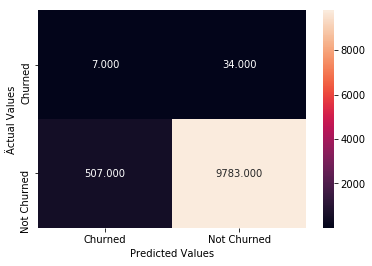

In [77]:
sns.heatmap(cm,annot=True,fmt='.3f',xticklabels=["Churned","Not Churned"], yticklabels=["Churned","Not Churned"])
plt.xlabel("Predicted Values")
plt.ylabel("Äctual Values")